In [1]:
import os, subprocess
import json
import uproot
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('lumi.json') as f:
  lumis = json.load(f)

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

ddbthr = 0.64

In [3]:
year='2016'
picklename = year+'/templates.pkl'
if not os.path.isfile(picklename):
    print("You need to create the pickle "+picklename)
else:
    templates = pickle.load(open(picklename,'rb')).integrate('systematic','nominal').integrate('mjj',overflow='allnan')

In [4]:
vbf_drON = templates.integrate('process','VBF').integrate('region',['signal-ggf','signal-vbf']).sum('genflavor')
vbf_drOFF = templates.integrate('process','VBFDipoleRecoilOff').integrate('region',['signal-ggf','signal-vbf']).sum('genflavor')

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 0.98, 'VBF 2018')

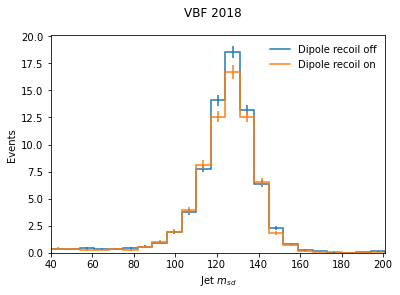

In [5]:
msd1 = vbf_drON.sum('pt1','ddb1')
msd2 = vbf_drOFF.sum('pt1','ddb1')

hist.plot1d(msd2)
hist.plot1d(msd1)
plt.legend(frameon=False,labels=['Dipole recoil off','Dipole recoil on'])
plt.suptitle('VBF '+ year)

In [6]:
picklename = year+'/smalljetkin.pkl'
if not os.path.isfile(picklename):
    print("You need to create the pickle "+picklename)
else:
    templates = pickle.load(open(picklename,'rb'))

In [7]:
vbf_drON = templates.integrate('process','VBF').integrate('region',['signal-ggf','signal-vbf'])
vbf_drOFF = templates.integrate('process','VBFDipoleRecoilOff').integrate('region',['signal-ggf','signal-vbf'])

Text(0.5, 0.98, 'VBF 2018')

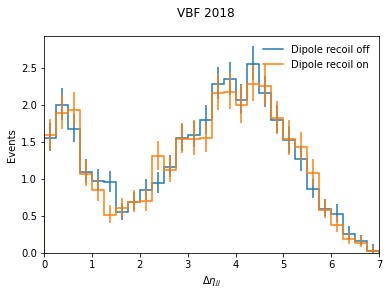

In [8]:
deta1 = vbf_drON.sum('dphi','mjj','ddb1')
deta2 = vbf_drOFF.sum('dphi','mjj','ddb1')

hist.plot1d(deta2)
hist.plot1d(deta1)
plt.legend(frameon=False,labels=['Dipole recoil off','Dipole recoil on'])
plt.suptitle('VBF '+ year)

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 0.98, 'VBF 2018')

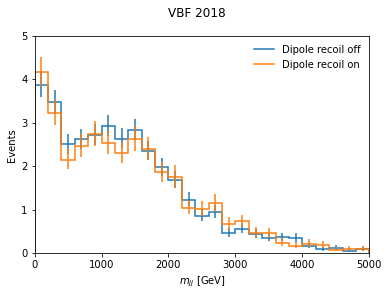

In [9]:
mjj1 = vbf_drON.sum('dphi','deta','ddb1')
mjj2 = vbf_drOFF.sum('dphi','deta','ddb1')

hist.plot1d(mjj2)
hist.plot1d(mjj1)
plt.legend(frameon=False,labels=['Dipole recoil off','Dipole recoil on'])
plt.xlim(0,5000)
plt.ylim(0,5)
plt.suptitle('VBF '+ year)

In [10]:
picklename = year+'/fatjetkin.pkl'
if not os.path.isfile(picklename):
    print("You need to create the pickle "+picklename)
else:
    templates = pickle.load(open(picklename,'rb'))

In [11]:
vbf_drON = templates.integrate('process','VBF').integrate('region',['signal-ggf','signal-vbf'])
vbf_drOFF = templates.integrate('process','VBFDipoleRecoilOff').integrate('region',['signal-ggf','signal-vbf'])

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 0.98, 'VBF 2018')

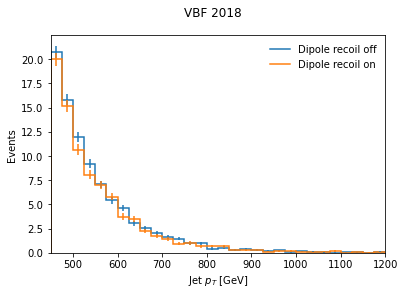

In [12]:
pt1 = vbf_drON.sum('eta1','ddb1','n2ddt1')
pt2 = vbf_drOFF.sum('eta1','ddb1','n2ddt1')

hist.plot1d(pt2)
hist.plot1d(pt1)
plt.legend(frameon=False,labels=['Dipole recoil off','Dipole recoil on'])

plt.suptitle('VBF '+ year)

Text(0.5, 0.98, 'VBF 2018')

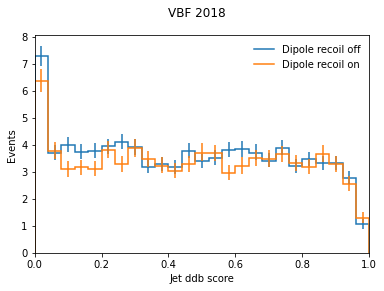

In [13]:
ddb1 = vbf_drON.sum('eta1','pt1','n2ddt1')
ddb2 = vbf_drOFF.sum('eta1','pt1','n2ddt1')

hist.plot1d(ddb2)
hist.plot1d(ddb1)
plt.legend(frameon=False,labels=['Dipole recoil off','Dipole recoil on'])

plt.suptitle('VBF '+ year)